Kumpulan data berisi transaksi yang dilakukan dengan kartu kredit pada September 2013 oleh pemegang kartu Eropa. Dataset ini menyajikan transaksi yang terjadi dalam dua hari, di mana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.

Ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA. Sayangnya, karena masalah kerahasiaan, kami tidak dapat menyediakan fitur asli dan informasi latar belakang lainnya tentang data. Fitur V1, V2, ... V28 adalah komponen utama yang diperoleh dengan PCA, satu-satunya fitur yang belum ditransformasikan dengan PCA adalah 'Waktu' dan 'Jumlah'. Fitur 'Waktu' berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam dataset. Fitur 'Jumlah' adalah Jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran yang bergantung pada biaya-misalnya. Fitur 'Kelas' adalah variabel respons dan dibutuhkan nilai 1 jika terjadi penipuan dan 0 sebaliknya.

In [1]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv("creditcard.csv")
# First 5 rows of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
real = round(df['Class'].value_counts()[0]/len(df) * 100, 2)

fraud = round(df['Class'].value_counts()[1]/len(df) * 100, 2)

print('Real Transaction : {} % of the dataset'.format(real))
print('Fraud Transaction : {} % of the dataset'.format(fraud))

Real Transaction : 99.83 % of the dataset
Fraud Transaction : 0.17 % of the dataset


# pre-processing

In [6]:
from sklearn.preprocessing import StandardScaler
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


In [7]:
df = df.drop(columns = ['Amount', 'Time'], axis=1)

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

# Data Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
____________________________________________________

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 23s 114us/step - loss: 0.0110 - accuracy: 0.9984
Epoch 2/5
199364/199364 [==============================] - 18s 92us/step - loss: 0.0041 - accuracy: 0.9992
Epoch 3/5
199364/199364 [==============================] - 18s 90us/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 18s 91us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 19s 95us/step - loss: 0.0032 - accuracy: 0.9994


In [12]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

85443/85443 [==============================] - 3s 36us/step
Test Accuracy: 99.94%
Test Loss: 0.0027591586045319877


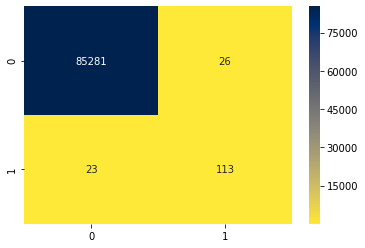

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

Hasil kami baik-baik saja tetapi itu bukan cara terbaik untuk melakukan hal-hal seperti itu. Karena dataset kami tidak seimbang (kami memiliki 492 penipuan dari 284.807 transaksi), kami akan menggunakan ‘sampel pengambilan sampel’. Pada dasarnya smot mengubah data tidak seimbang kami menjadi data seimbang.

# SMOTE Sampling

In [14]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_sample(X, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

1    284315
0    284315
Name: 0, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 38s 95us/step - loss: 0.0289 - accuracy: 0.9900
Epoch 2/5
398041/398041 [==============================] - 37s 92us/step - loss: 0.0106 - accuracy: 0.9972
Epoch 3/5
398041/398041 [==============================] - 36s 90us/step - loss: 0.0079 - accuracy: 0.9981
Epoch 4/5
398041/398041 [==============================] - 38s 95us/step - loss: 0.0068 - accuracy: 0.9984
Epoch 5/5
398041/398041 [==============================] - 35s 89us/step - loss: 0.0065 - accuracy: 0.9985


In [16]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

170589/170589 [==============================] - 6s 35us/step
Test Accuracy: 99.78%
Test Loss: 0.009298874511069864


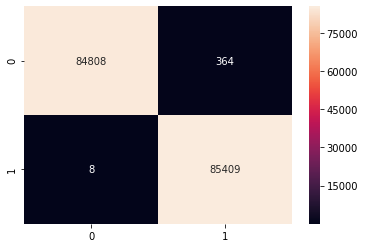

In [17]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

itu bukan hasil sebenarnya karena kami menggunakan data dengan smote sampling karena jumlah kelas 0 dan kelas 1 sama di sini. Itu sebabnya kami akan menggunakan seluruh data yang kami impor di awal.

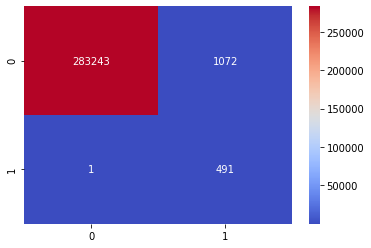

In [18]:
y_pred2 = model.predict(X)
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [19]:
scoreNew = model.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

284807/284807 [==============================] - 11s 40us/step
Test Accuracy: 99.62%
Test Loss: 0.01544607342545135


In [20]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      1.00      0.48       492

    accuracy                           1.00    284807
   macro avg       0.66      1.00      0.74    284807
weighted avg       1.00      1.00      1.00    284807

